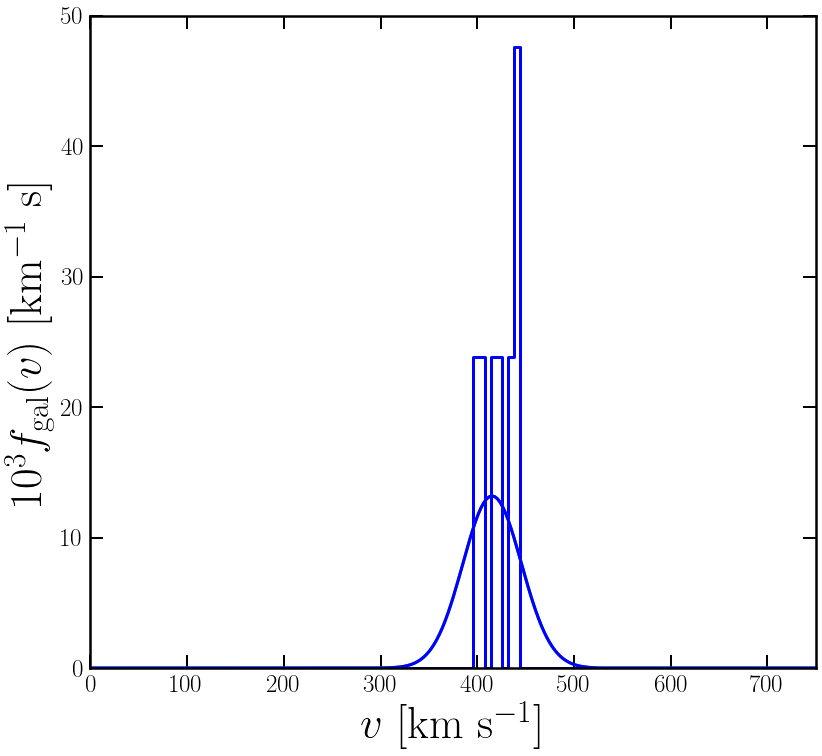

In [23]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from PlotFuncs import *
from LabFuncs import *
from Params import *
from HaloFuncs import *
from scipy.stats import norm
import pandas

# Load shards
df = pandas.read_csv('../data/FitShards_red.csv')
names = df.group_id
nshards = size(names)
velocities = zeros(shape=(nshards,3))
dispersions = zeros(shape=(nshards,3))
velocities[0:(nshards),0] = df.vx # stream velocities
velocities[0:(nshards),1] = df.vy
velocities[0:(nshards),2] = df.vz
dispersions[0:(nshards),0] = df.sigx # dispersion tensors
dispersions[0:(nshards),1] = df.sigy
dispersions[0:(nshards),2] = df.sigz
pops = df.population
Psun = df.Psun
#weights = pops*norm.pdf(Psun,loc=0.0,scale=1.0)/norm.pdf(0.0,loc=0.0,scale=1.0)
weights = pops
weights[weights==]
weights /= sum(weights)


xlab = r"$v$ [km s$^{-1}$]"
ylab1 = r"$10^3 f_{\rm gal}(v)$ [km$^{-1}$ s]"
n = 300
v = linspace(0.01,850.0,n)
HaloModel = SHMpp
v0 = HaloModel.RotationSpeed
v_esc = HaloModel.EscapeSpeed
sig_beta = HaloModel.SausageDispersionTensor
sig_iso = array([1.0,1.0,1.0])*v0/sqrt(2.0)
day = 67.0 
n_xi = 10
xi_max = 0.35
xi_vals = linspace(0.0,xi_max,n_xi)
fig,ax = MySquarePlot(xlab,ylab1)
eta = 0.2




namei = 'NCand8'


df_S = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
all_names = df_S.group_id.unique()

df_sel = df_S.loc[df_S['group_id']==namei]
vv = sqrt((df_sel.GalRVel)**2.0+(df_sel.GalTVel)**2.0+(df_sel.GalzVel)**2.0)
fv,vbins = histogram(vv,bins=100,normed=True,range=(0,600))
plt.step(vbins[1:],1e3*fv,'-',color='b',lw=3)

fv_gal1 = zeros(shape=n)
for i in range(0,nshards):
    if names[i] in [namei,namei+'a',namei+'b']:
        v_s = velocities[i,:]
        sig_s = dispersions[i,:]
        if sqrt(sum(sig_s**2.0))>1.0:
            fv_gal1 += weights[i]*SpeedDist_Triaxial(v,day,sig_s,v_shift=v_s,GalFrame=True,SmoothCutoff=True)
            plt.plot(v,1e3*fv_gal1/trapz(fv_gal1,v),'-',lw=3)
    
plt.plot(v,1e3*fv_gal1/trapz(fv_gal1,v),'b-',lw=3)

    

plt.xlim([0,750])
ax.set_ylim(bottom=0.0)
plt.show()

[[  88.89789585  330.31403152 -174.59682766]] 384.049798248
88.8978958486 330.314031523 -174.596827656 422.046914247
1.09893799234
PlotFuncs.py:289: RuntimeWarning: divide by zero encountered in log
  fv = log(fv)

PlotFuncs.py:134: RuntimeWarning: divide by zero encountered in log
  Lsun = log(multivariate_normal.pdf(Sun, mean=xyz, cov=dxyz))



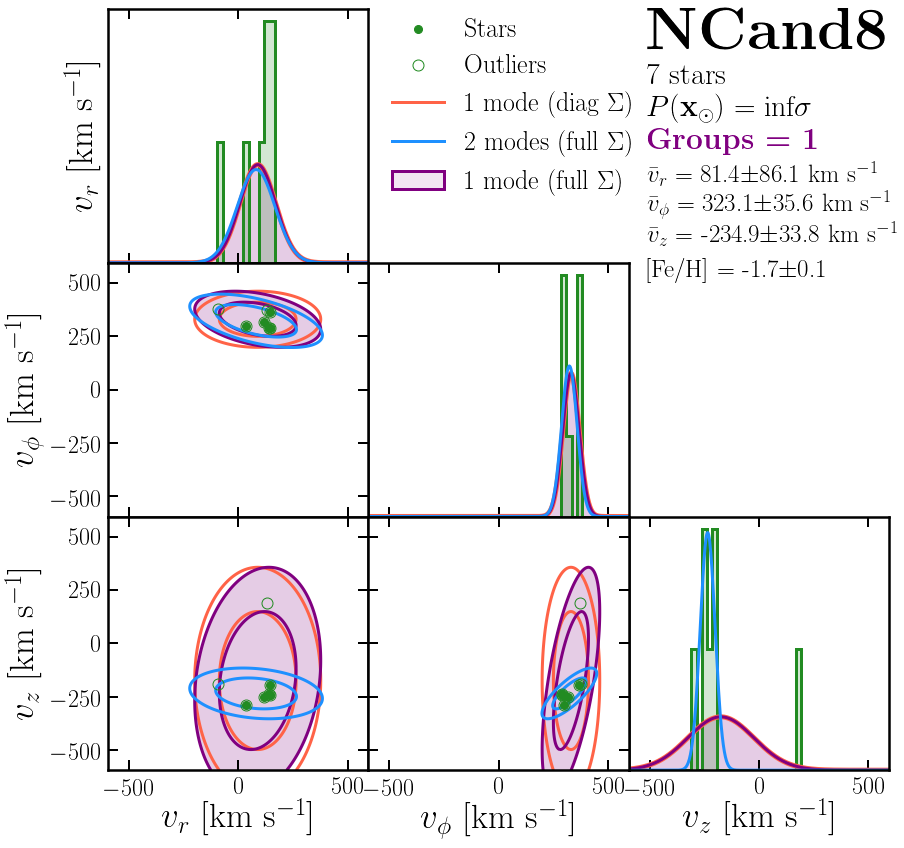

In [14]:
x_meens,x_covs,v_meens,v_covs,fehs,pops,Psun = FitStars(df_sel)
print v_meens,sqrt(sum(v_meens[0,:]**2.0))
print mean(df_sel.GalRVel),mean(df_sel.GalTVel),mean(df_sel.GalzVel),mean(vv)
print mean(vv)/sqrt(sum(v_meens[0,:]**2.0))
fig = VelocityTriangle(df_sel)
plt.show()

0 0.00481875129232
1 0.0112437530154
2 0.0329281338309
3 0.0337312590462
4 0.0401562607693
5 0.0401562607693
6 0.0429671990231
7 0.0465812624924
8 0.0518015763924
9 0.0534078268232
10 0.0550140772539
11 0.0582265781155
12 0.0618406415847
13 0.0670609554847
14 0.0714781441694
15 0.0771000206771
16 0.081115646754
17 0.0843281476155
18 0.0859343980463
19 0.0919578371617
20 0.100390651923
21 0.104406278
22 0.113642217977
23 0.121673470131
24 0.125689096208
25 0.133720348362
26 0.137334411831
27 0.140948475301
28 0.148578164847
29 0.156207854393
30 0.161026605686
31 0.164640669155
32 0.172270358701
33 0.176285984778
34 0.178293797816
35 0.183112549109
36 0.184317236932
37 0.187931300401
38 0.188734425617
39 0.192348489086
40 0.195560989948
41 0.201584429063
42 0.20560005514
43 0.207607868179
44 0.214835995117
45 0.218851621194
46 0.222465684663
47 0.22487506031
48 0.226882873348
49 0.230496936817
50 nan
51 nan
52 nan
53 nan
54 nan
55 nan
56 nan
57 nan
58 nan
59 nan
60 nan
61 nan
62 nan
63 n

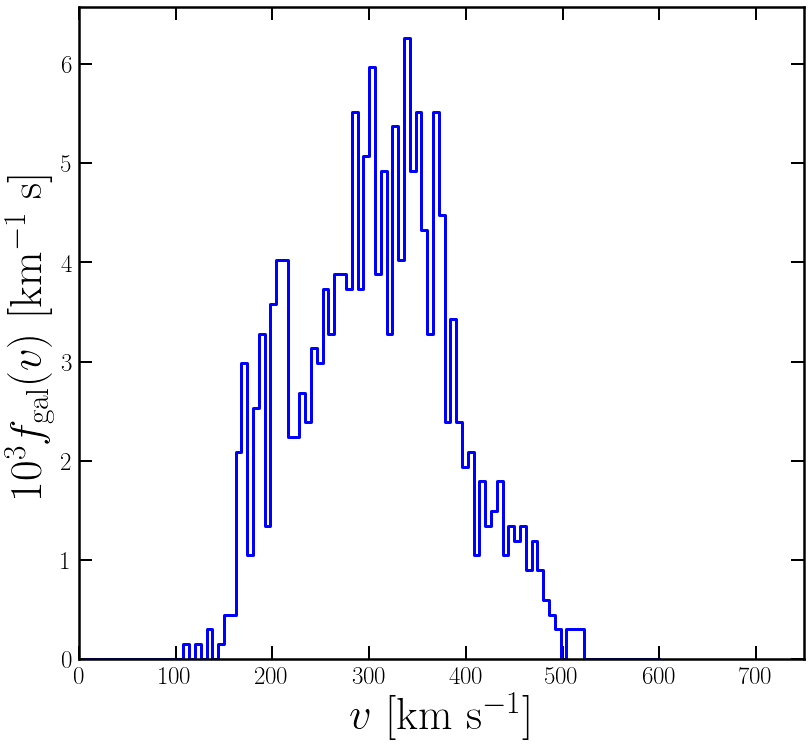

In [30]:
fig,ax = MySquarePlot(xlab,ylab1)
eta = 0.2


df_S = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
all_names = names = df_S.group_id.unique()
df_sel = df_S
vv = sqrt((df_sel.GalRVel)**2.0+(df_sel.GalTVel)**2.0+(df_sel.GalzVel)**2.0)
fv,vbins = histogram(vv,bins=100,normed=True,range=(0,600))
plt.step(vbins[1:],1e3*fv,'-',color='b',lw=3)

fv_gal1 = zeros(shape=n)
for i in range(0,nshards):
    v_s = velocities[i,:]
    sig_s = dispersions[i,:]
    if sqrt(sum(sig_s**2.0))>1.0:
        fv_gal1 += weights[i]*SpeedDist_Triaxial(v,day,sig_s,v_shift=v_s,GalFrame=True,SmoothCutoff=True)
    print i,sum(fv_gal1)
plt.plot(v,1e3*fv_gal1/trapz(fv_gal1,v),'b-',lw=3)

    
plt.xlim([0,750])
ax.set_ylim(bottom=0.0)
plt.show()

In [35]:
sqrt(sum(dispersions[50,:]**2.0))

33.584717207337221

In [7]:
Cand = df_sel


# Get data
name = Cand.group_id.unique()[0]
nstars = size(Cand,0)
feh = Cand.feh # metallicity
vx,vy,vz = Cand.GalRVel,Cand.GalTVel,Cand.GalzVel # velocities
x,y,z = Cand.GalRecX,Cand.GalRecY,Cand.GalRecZ # positions
    # Get data
    name = Cand.group_id.unique()[0]
    nstars = size(Cand,0)
    feh = Cand.feh # metallicity
    vx,vy,vz = Cand.GalRVel,Cand.GalTVel,Cand.GalzVel # velocities
    x,y,z = Cand.GalRecX,Cand.GalRecY,Cand.GalRecZ # positions

    # Remove outliers if needed
    if RemoveOutliers:
        x_red,y_red,z_red,vx_red,vy_red,vz_red,feh_red = RemovePhaseSpaceOutliers(x,y,z,vx,vy,vz,feh,z_th=z_th)
        data1 = array([x_red,y_red,z_red,vx_red,vy_red,vz_red,feh]).T
    else:
        data2 = array([x,y,z,vx,vy,vz,feh]).T



In [22]:
df

,group_id,x,y,z,dx,dy,dz,vx,vy,vz,sigx,sigy,sigz,feh,dfeh,population,Psun
0,S1a,8.144755,-0.336208,2.756541,0.415441,1.134558,0.611698,90.894975,-310.370134,-52.099832,47.926726,25.198756,62.975690,-1.833847,0.205878,12.0,4.228009
1,S1b,8.529249,1.247849,2.504264,0.565044,0.992010,1.029779,-95.099864,-297.169258,-100.571828,36.513025,40.302352,29.803500,-2.008142,0.263168,16.0,1.782909
2,S2a,8.875749,0.198735,0.157000,0.596699,0.936686,2.451619,0.640222,162.327503,-238.369638,46.284083,14.500559,25.372084,-1.946772,0.236097,54.0,0.454685
3,S2b,8.833954,0.771728,2.070132,1.324201,0.021803,1.294304,16.347258,156.078969,240.090428,23.277248,10.316115,38.919084,-1.810805,0.208692,2.0,inf
4,C2a,8.745746,-0.741814,2.670906,1.045283,0.778070,1.880257,-347.994053,105.540568,270.883887,45.093378,32.404226,84.738533,-1.443843,0.127125,16.0,0.932476
5,C2b,9.073969,-1.066600,3.050773,0.001000,0.001000,0.001000,354.728426,120.197904,-259.071198,0.001000,0.001000,0.001000,-1.358053,0.001000,1.0,inf
6,Rg1a,8.289840,-1.240535,4.056581,0.883198,1.311008,0.790601,173.501716,-396.185835,-66.361588,101.355754,39.994542,67.444146,-1.668084,0.125725,7.0,4.550133
7,Rg1b,8.158361,1.390586,4.428906,0.878006,1.565657,0.959414,-8.384518,-392.789918,196.981303,52.478245,41.027842,89.474839,-1.489887,0.159050,9.0,3.998985
8,Rg2a,8.933350,0.292586,4.366950,0.757699,2.076280,2.670193,44.463356,-248.409084,185.176718,105.948147,23.089300,63.468679,-1.610013,0.201529,13.0,1.080687
9,Rg2b,9.155584,1.251465,3.704074,0.358015,0.443550,1.524472,46.126474,-244.955709,-199.867586,94.316732,17.744995,39.777107,-1.647580,0.029896,4.0,4.013791


In [27]:
weights

0     0.013699
1     0.018265
2     0.061644
3     0.002283
4     0.018265
5     0.001142
6     0.007991
7     0.010274
8     0.014840
9     0.004566
10    0.004566
11    0.009132
12    0.010274
13    0.014840
14    0.012557
15    0.015982
16    0.011416
17    0.009132
18    0.004566
19    0.017123
20    0.023973
21    0.011416
22    0.026256
23    0.022831
24    0.011416
25    0.022831
26    0.010274
27    0.010274
28    0.021689
29    0.021689
        ...   
61    0.004566
62    0.018265
63    0.009132
64    0.009132
65    0.004566
66    0.005708
67    0.006849
68    0.006849
69    0.009132
70    0.002283
71    0.012557
72    0.007991
73    0.009132
74    0.003425
75    0.012557
76    0.010274
77    0.010274
78    0.006849
79    0.005708
80    0.009132
81    0.003425
82    0.007991
83    0.006849
84    0.007991
85    0.005708
86    0.011416
87    0.009132
88    0.007991
89    0.005708
90    0.006849
Name: population, Length: 91, dtype: float64

In [29]:
dispersions

array([[  4.79267258e+01,   2.51987558e+01,   6.29756905e+01],
       [  3.65130250e+01,   4.03023516e+01,   2.98034999e+01],
       [  4.62840834e+01,   1.45005595e+01,   2.53720835e+01],
       [  2.32772481e+01,   1.03161148e+01,   3.89190836e+01],
       [  4.50933782e+01,   3.24042264e+01,   8.47385328e+01],
       [  1.00000000e-03,   1.00000000e-03,   1.00000000e-03],
       [  1.01355754e+02,   3.99945425e+01,   6.74441456e+01],
       [  5.24782454e+01,   4.10278418e+01,   8.94748388e+01],
       [  1.05948147e+02,   2.30892996e+01,   6.34686793e+01],
       [  9.43167322e+01,   1.77449947e+01,   3.97771069e+01],
       [  9.14034429e+01,   4.93527298e+01,   9.53914584e+01],
       [  7.00251728e+01,   5.51709169e+01,   1.03995529e+02],
       [  6.44045612e+01,   2.61454401e+01,   1.74882616e+02],
       [  5.09293524e+01,   1.74109408e+01,   3.49034755e+01],
       [  5.33596519e+01,   1.81583146e+01,   3.27333960e+01],
       [  8.12160310e+01,   3.14915401e+01,   9.5658724